# ILT 01 - Pre Processing Data in Python

Rafi Achmad Fahreza - M227B4KY3579 - University of Jember - Machine Learning Path

## A. Exploratory Data Analysis (EDA)

### 01. Data checking

libraries import

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline     
sns.set(color_codes=True)

Checking the imported data is correct

In [61]:
df = pd.read_csv("data.csv")
print (df)

     Curvature  Kepadatan  Bin Tertinggi  Posisi   Label
0     3.894634   0.039355      21.462067    96.0    Flat
1     4.258516   0.030587      21.972471    66.0    Flat
2     5.117797   0.016024      22.148182    30.0    Flat
3     4.881555   0.018682      20.408575    87.0    Flat
4     4.784719   0.018596      20.888229    87.0    Flat
..         ...        ...            ...     ...     ...
302   4.136228   0.026326      21.533203   111.0  Normal
303   4.300099   0.027843      21.811472    63.0  Normal
304   4.974874   0.024422      21.749126    90.0  Normal
305   4.946176   0.022955      21.891178    63.0  Normal
306   5.581588   0.014253      20.222574    63.0  Normal

[307 rows x 5 columns]


### 02. Check for null (empty) data

In [62]:
print(df.isnull().sum())

Curvature        0
Kepadatan        0
Bin Tertinggi    0
Posisi           0
Label            0
dtype: int64


### 03. Check duplicate data

In [63]:
duplicate_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_data.shape)

number of duplicate rows:  (9, 5)


remove duplicate data

In [64]:
df = df.drop_duplicates()
df.shape

(298, 5)

### 04. Outliers data Detection

Matplotlib

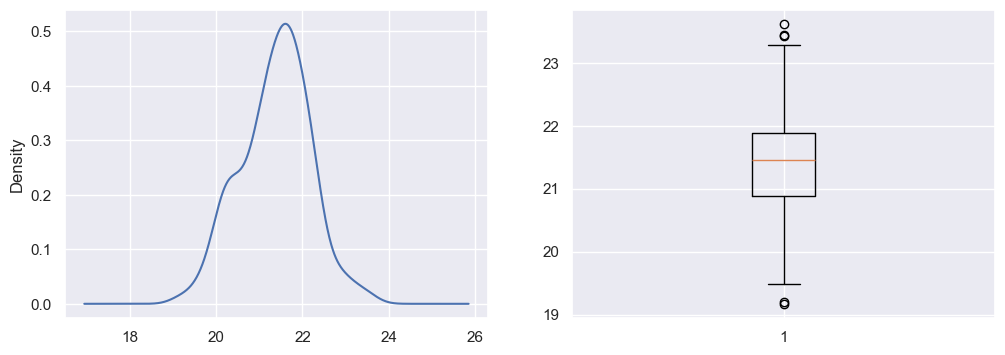

In [65]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Bin Tertinggi'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Bin Tertinggi'])
plt.show()

Seaborn

<Axes: xlabel='Curvature'>

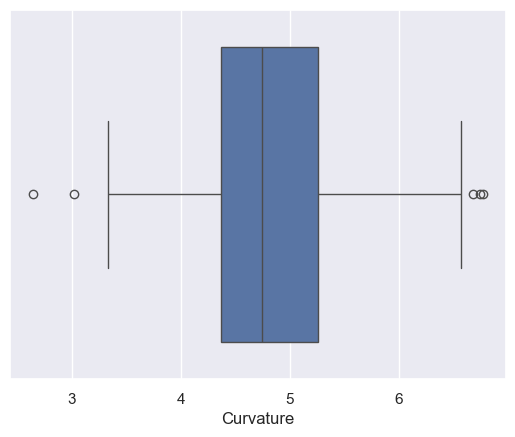

In [66]:
sns.boxplot(x=df['Curvature'])

## B. Data Normalization

libraries import

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
print (df)

     Curvature  Kepadatan  Bin Tertinggi  Posisi   Label
0     3.894634   0.039355      21.462067    96.0    Flat
1     4.258516   0.030587      21.972471    66.0    Flat
2     5.117797   0.016024      22.148182    30.0    Flat
3     4.881555   0.018682      20.408575    87.0    Flat
4     4.784719   0.018596      20.888229    87.0    Flat
..         ...        ...            ...     ...     ...
302   4.136228   0.026326      21.533203   111.0  Normal
303   4.300099   0.027843      21.811472    63.0  Normal
304   4.974874   0.024422      21.749126    90.0  Normal
305   4.946176   0.022955      21.891178    63.0  Normal
306   5.581588   0.014253      20.222574    63.0  Normal

[298 rows x 5 columns]


MinMaxScaler Equation:
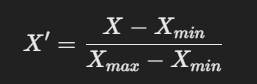

In [69]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['Curvature', 'Kepadatan', 'Bin Tertinggi', 'Posisi']])
print (scaled)

[[0.30274501 0.50006155 0.5146252  0.68888889]
 [0.39070612 0.3458718  0.62929299 0.46666667]
 [0.59841991 0.08977403 0.66876837 0.2       ]
 ...
 [0.56387117 0.23745714 0.57911611 0.64444444]
 [0.55693401 0.21165919 0.61102963 0.44444444]
 [0.710532   0.05863009 0.23615966 0.44444444]]


## C. Export data to csv file

Merge normalized data with initial label

In [70]:
df_scaled = pd.DataFrame(scaled, columns=['Curvature', 'Kepadatan', 'Bin Tertinggi', 'Posisi'])
df_scaled['Label'] = df['Label']

# Cek hasil
print(df_scaled)

     Curvature  Kepadatan  Bin Tertinggi    Posisi   Label
0     0.302745   0.500062       0.514625  0.688889    Flat
1     0.390706   0.345872       0.629293  0.466667    Flat
2     0.598420   0.089774       0.668768  0.200000    Flat
3     0.541313   0.136516       0.277947  0.622222    Flat
4     0.517905   0.135004       0.385706  0.622222    Flat
..         ...        ...            ...       ...     ...
293   0.361145   0.270940       0.530607  0.800000  Normal
294   0.400758   0.297617       0.593123  0.444444  Normal
295   0.563871   0.237457       0.579116  0.644444  Normal
296   0.556934   0.211659       0.611030  0.444444  Normal
297   0.710532   0.058630       0.236160  0.444444  Normal

[298 rows x 5 columns]


Export data

In [71]:
df_scaled.to_csv('normalized_data.csv', index=False)

normalized_data.csv'.
